In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pickle
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
import pickle
from moviepy.editor import VideoFileClip
from tqdm import tqdm

## Writeup Template
### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./output_images/1_undistorted.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"

## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points
###Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
###Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  

### Camera Calibration

####1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in ple.ipynb" (or in lines # through # of the file called `some_file.py`).  

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result: 

![alt text][image1]

###Pipeline (single images)

####1. Provide an example of a distortion-corrected image.
To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
The code for this step is contained in `calibrate.py`.

First `objp` array of points is created. Then we get a glob of all files in
`camera_cal` file. 
Then we iterate over all images and run `cv2.findChessboardCorners`. The
returned `corners` along with `objp` are appended into `objpoints` and
`corners` array.

At the end, all these `objpoints` and `imgpoints` are passed to
`cv2.calibrateCamera` and returned `mtx, dist` is saved into
a `calibration.pkl` file.

![Distorted and Undistorted][image1]

####2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.
I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in `another_file.py`).  Here's an example of my output for this step.  (note: this is not actually from one of the test images)

![alt text][image3]

####3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

```
This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

![alt text][image4]

####4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

Then I did some other stuff and fit my lane lines with a 2nd order polynomial kinda like this:

![alt text][image5]

####5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in lines # through # in my code in `my_other_file.py`

####6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines # through # in my code in `yet_another_file.py` in the function `map_lane()`.  Here is an example of my result on a test image:

![alt text][image6]

---

###Pipeline (video)

####1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](./project_video.mp4)

---

###Discussion

####1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  



In [ ]:
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(nx,ny,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)


        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.imshow(img)
        plt.show()
        
    
def save_calibration(objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    calib = [mtx, dist]
    pickle.dump(calib, open("calibration.pkl", "wb"))


save_calibration(objpoints, imgpoints)
print("Calibration Saved")


Calibration Loaded


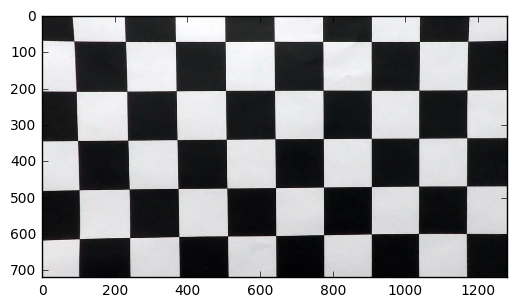

In [2]:

def load_calibration():
    calib = pickle.load(open("calibration.pkl", "rb"))
    print("Calibration Loaded")
    return calib[0], calib[1]

#load calibration
mtx, dist = load_calibration()

test_image = cv2.imread('camera_cal/calibration1.jpg')
undist = cv2.undistort(test_image, mtx, dist)
plt.imshow(undist)
plt.show()

In [3]:
img_size = (1280, 720)

def load_transforms():
    #load perspective vars
    src = np.float32([[  585.0-10,  460.0],
               [ 0.0,  720.0],
               [ 1280.0,  720.0],
               [ 695.0+10,  460.0]])

    dst = np.float32([[320, 0], 
                      [320, 720],
                      [960, 720], 
                        [960, 0]])
            
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M, Minv

M, Minv = load_transforms()

def fast_unwarp_lane(img):
    global dist, mtx, img_size
    undist = cv2.undistort(img, mtx, dist)
    out = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    return out

def fast_warp_lane(lane):
    global Minv, img_size
    unwarped = cv2.warpPerspective(lane, Minv, img_size, flags=cv2.INTER_LINEAR)
    return unwarped

def process_video(infile, outfile, method):
    """method has to accept rgb image and return rgb image. method is called on every frame of infile."""
    clip1 = VideoFileClip(infile)
    white_clip = clip1.fl_image(method) #NOTE: this function expects color images!!
    white_clip.write_videofile(outfile, audio=False)

def plot_images(images):
    """ Helper routine which plots all images passed as array in a single row """
    m = len(images)
    n = len(images[0])
    
    fig, axes = plt.subplots(m, n, figsize=(10*n, 10*m))
    fig.tight_layout()
    for ix in range(m):
        for iy in range(n):
            axes[ix][iy].imshow(images[ix][iy], cmap='gray')
            axes[ix][iy].axis('off')
    plt.show()


def abs_sobel_thresh(img_gray, orient='x', ksize=3,  thresh=(20,100)):    
    sobel = None
    if orient=='x':
        sobel = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=ksize)
    else:
        sobel = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=ksize)
    abs_sobel = np.absolute(sobel)
    scaled = np.uint8(255*abs_sobel/np.max(abs_sobel))

    binary_output = np.zeros_like(scaled)
    binary_output[(scaled >= thresh[0]) & (scaled <= thresh[1])] = 1
    
    return binary_output

def mag_thresh(gray, ksize=9, thresh=(20,80)):
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    abssolxy = np.sqrt(sobelx ** 2 + sobely ** 2)    
    scaledxy = (abssolxy*255/np.max(abssolxy)).astype(np.uint8)
    binary_output = np.zeros_like(scaledxy)
    binary_output[(scaledxy >= thresh[0]) & (scaledxy <= thresh[1])] = 1
    return binary_output
    
def dir_thresh(gray, ksize=15, thresh=(0.0, np.pi/2)):    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    abssobelx = np.absolute(sobelx)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    abssobely = np.absolute(sobely)
    
    abssobelxy = np.arctan2(abssobely,abssobelx)

    binary_output = np.zeros(abssobelxy.shape, dtype=np.uint8)
    binary_output[(abssobelxy >= thresh[0]) & (abssobelxy <= thresh[1])] = 1
    return binary_output

def hls_select(image_hsv):
    i_h = image_hsv[:,:,0]
    i_s = image_hsv[:,:,1]
    i_v = image_hsv[:,:,2]
    
    res = np.zeros_like(i_h).astype(np.uint8)
    res[((i_h > 0) & (i_h < 80)) & (i_s > 80) & (i_v > 100)]  = 1 #yellow only
    res[(i_s < 65) & (i_v > 200)]  = 1 #white only
    
    return res

def apply_stage_1(img_hsv):
    img_gray = img_hsv[:,:,1] #sobel operators don't work very well on rgb to isolate the lane lines. hsv they work very well
    
    x_image = abs_sobel_thresh(img_gray, orient='x', ksize=3, thresh=(20,200))
    y_image = abs_sobel_thresh(img_gray, orient='y', ksize=3, thresh=(20,200))
    xy_image = mag_thresh(img_gray, ksize=9, thresh=(20,100))
    dir_image = dir_thresh(img_gray, ksize=9, thresh=(0.7, 1.3))

    img_stage_1 = np.zeros_like(x_image)
    #img_stage_1[(x_image == 1) | ((xy_image == 1) & (dir_image == 1))]  = 1 #dir_image is not working after lot of trials and error.
    img_stage_1[((x_image == 1) | (y_image == 1))]  = 1
    return img_stage_1

def apply_thresholds(img):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    stage_1 = apply_stage_1(img_hsv)
    stage_2 = hls_select(img_hsv)
    
    # hsv is generally better overall. x/y only on certain occasions.
    res = (stage_1 * 72) + (stage_2 * 182) # lot of trials, got this. hsv is prominent, but xy sobel is when hsv is not working.
    
    binary_out = np.zeros_like(res)
    binary_out[res > 100] = 1
    return binary_out


In [ ]:
img = mpimg.imread('test_images/test6.jpg')
out = fast_unwarp_lane(img)

plt.imshow(img)
plt.show()

plt.imshow(out)
plt.grid(True)
plt.show()

# Unwarped Video

lets check how the complete video will look like and make sure all turns are covered in the frame.

# Masking Lanes

lets first conserve the yellow and white lanes as much as possible and filter all unwanted parts of the image.

`mask_image` method does this job. 

In [ ]:
imagenames = glob.glob('test_images/*.jpg')

images = []

for ix, fname in enumerate(imagenames):
    img = mpimg.imread(fname)

    res = apply_thresholds(img)
    
    res_rgb = np.dstack((res,res,res))*255
    rgb_warped = fast_unwarp_lane(res_rgb)

    images.append([img, res, rgb_warped])
    
plot_images(images)
    

In [ ]:
for res_images in images:
    lane = res_images[-1]
    histogram = np.sum(lane[lane.shape[0]/2:, :], axis=0)
    plt.plot(histogram)
    plt.show()

In [4]:
class Line:
    def __init__(self):
        self.lane_inds = []
        # was the line detected in the last iteration?
        #self.detected = False
        # x values of the last n fits of the line
        #self.recent_xfitted = []
        #average x values of the fitted line over the last n iterations
        #self.bestx = None
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None
        #polynomial coefficients for the most recent fit
        self.current_fit = np.array([False])
        self.previous_fit = []
        #radius of curvature of the line in some units
        self.radius_of_curvature = 0


        #distance in meters of vehicle center from the line
        #self.line_base_pos = None
        #difference in fit coefficients between last and new fits
        #self.diffs = np.array([0,0,0], dtype='float')
        #x values for detected line pixels
        #self.allx = None
        #y values for detected line pixels
        #self.ally = None

class Lane:
    
    def __init__(self):
        self.left = Line()
        self.right = Line()
    
    def binary_warped(self, img):
        res = apply_thresholds(img)
        res_rgb = np.dstack((res*255, res*255, res*255))
        lane = fast_unwarp_lane(res_rgb)
        
        binary_warped = lane[:,:,2]
        return binary_warped
    
    def sliding_window(self, img):
        binary_warped = self.binary_warped(img)
        
        if self.left.current_fit.size > 0:
            out = self.sliding_first(binary_warped)
        else:
            out = self.sliding_next(binary_warped)
        
        self.process_fits()
        out = self.draw_projection(binary_warped)

        return out


    def sliding_first(self, binary_warped):
        # Takins in binary warped, and returns sliding window drawn image with
        # left right inds colored
        
        # Take a histogram of the bottom half of the image
        histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
        # Create an output image to draw on and  visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        self.left.lane_inds = []
        self.right.lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            self.left.lane_inds.append(good_left_inds)
            self.right.lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        self.left.lane_inds = np.concatenate(self.left.lane_inds)
        self.right.lane_inds = np.concatenate(self.right.lane_inds)

        # Extract left and right line pixel positions
        leftx = nonzerox[self.left.lane_inds]
        lefty = nonzeroy[self.left.lane_inds] 
        rightx = nonzerox[self.right.lane_inds]
        righty = nonzeroy[self.right.lane_inds] 

        # Fit a second order polynomial to each
        self.left.current_fit = np.polyfit(lefty, leftx, 2)
        self.right.current_fit = np.polyfit(righty, rightx, 2)

        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = self.left.current_fit[0]*ploty**2 + self.left.current_fit[1]*ploty + self.left.current_fit[2]
        right_fitx = self.right.current_fit[0]*ploty**2 + self.right.current_fit[1]*ploty + self.right.current_fit[2]

        out_img[nonzeroy[self.left.lane_inds], nonzerox[self.left.lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[self.right.lane_inds], nonzerox[self.right.lane_inds]] = [0, 0, 255]

        return out_img

    def sliding_next(self,binary_warped):
        # We now have a new warped binary image
        # It's now much easier to find line pixels!
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 100
        self.left.lane_inds = ((nonzerox > (self.left.current_fit[0]*(nonzeroy**2) + self.left.current_fit[1]*nonzeroy + self.left.current_fit[2] - margin)) & (nonzerox < (self.left.current_fit[0]*(nonzeroy**2) + self.left.current_fit[1]*nonzeroy + self.left.current_fit[2] + margin)))
        self.right.lane_inds = ((nonzerox > (self.right.current_fit[0]*(nonzeroy**2) + self.right.current_fit[1]*nonzeroy + self.right.current_fit[2] - margin)) & (nonzerox < (self.right.current_fit[0]*(nonzeroy**2) + self.right.current_fit[1]*nonzeroy + self.right.current_fit[2] + margin)))  

        # Again, extract left and right line pixel positions
        leftx = nonzerox[self.left.lane_inds]
        lefty = nonzeroy[self.left.lane_inds] 
        rightx = nonzerox[self.right.lane_inds]
        righty = nonzeroy[self.right.lane_inds]
        # Fit a second order polynomial to each
        self.left.current_fit = np.polyfit(lefty, leftx, 2)
        self.right.current_fit = np.polyfit(righty, rightx, 2)
    
        return binary_warped

    
    def draw_search_window_area(self, binary_warped):
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[self.left.lane_inds], nonzerox[self.left.lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[self.right.lane_inds], nonzerox[self.right.lane_inds]] = [0, 0, 255]
        
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = self.left.current_fit[0]*ploty**2 + self.left.current_fit[1]*ploty + self.left.current_fit[2]
        right_fitx = self.right.current_fit[0]*ploty**2 + self.right.current_fit[1]*ploty + self.right.current_fit[2]
        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))
        
        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        return result

    def process_fits(self):
        last_n = 5
        
        self.left.previous_fit.append(self.left.current_fit)
        if len(self.left.previous_fit) > last_n:
            self.left.previous_fit = self.left.previous_fit[1:]
        self.l_best_fit = np.average(self.left.previous_fit, axis=0)
        
        self.right.previous_fit.append(self.right.current_fit)
        if len(self.right.previous_fit) > last_n:
            self.right.previous_fit = self.right.previous_fit[1:]
        self.r_best_fit = np.average(self.right.previous_fit, axis=0)

        self.left.current_fit = self.l_best_fit
        self.right.current_fit = self.r_best_fit

    
    def draw_curvature(self, img):
        #draws curvature metrics onto the img
        y_eval = np.max(img.shape[0]-1)
        left_curverad = ((1 + (2*self.left.current_fit[0]*y_eval + self.left.current_fit[1])**2)**1.5) / np.absolute(2*self.left.current_fit[0])
        right_curverad = ((1 + (2*self.right.current_fit[0]*y_eval + self.right.current_fit[1])**2)**1.5) / np.absolute(2*self.right.current_fit[0])
        #cv2.putText(img, "left:{0:.2f}".format(left_curverad), (100,100), cv2.FONT_HERSHEY_PLAIN,2, 255)
        #cv2.putText(img, "right:{0:.2f}".format(right_curverad), (100,150), cv2.FONT_HERSHEY_PLAIN,2, 255)
        #print(left_curverad, right_curverad)


        ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
        leftx = self.left.current_fit[0]*ploty**2 + self.left.current_fit[1]*ploty + self.left.current_fit[2]
        rightx = self.right.current_fit[0]*ploty**2 + self.right.current_fit[1]*ploty + self.right.current_fit[2]

        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        self.left.radius_of_curvature = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        self.right.radius_of_curvature  = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
        #print(left_curverad, 'm', right_curverad, 'm')
        
        cv2.putText(img, "Radius Left:{0:.2f}m".format(self.left.radius_of_curvature), (10,50), cv2.FONT_HERSHEY_PLAIN, 2, 255)
        cv2.putText(img, "Radius Right:{0:.2f}m".format(self.right.radius_of_curvature), (10,100), cv2.FONT_HERSHEY_PLAIN, 2, 255)
        # Example values: 632.1 m    626.2 m
        return img


    def draw_projection(self, binary_warped):
        #draws the projection and returns color image
        
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = self.left.current_fit[0]*ploty**2 + self.left.current_fit[1]*ploty + self.left.current_fit[2]
        right_fitx = self.right.current_fit[0]*ploty**2 + self.right.current_fit[1]*ploty + self.right.current_fit[2]

        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
        return color_warp
        


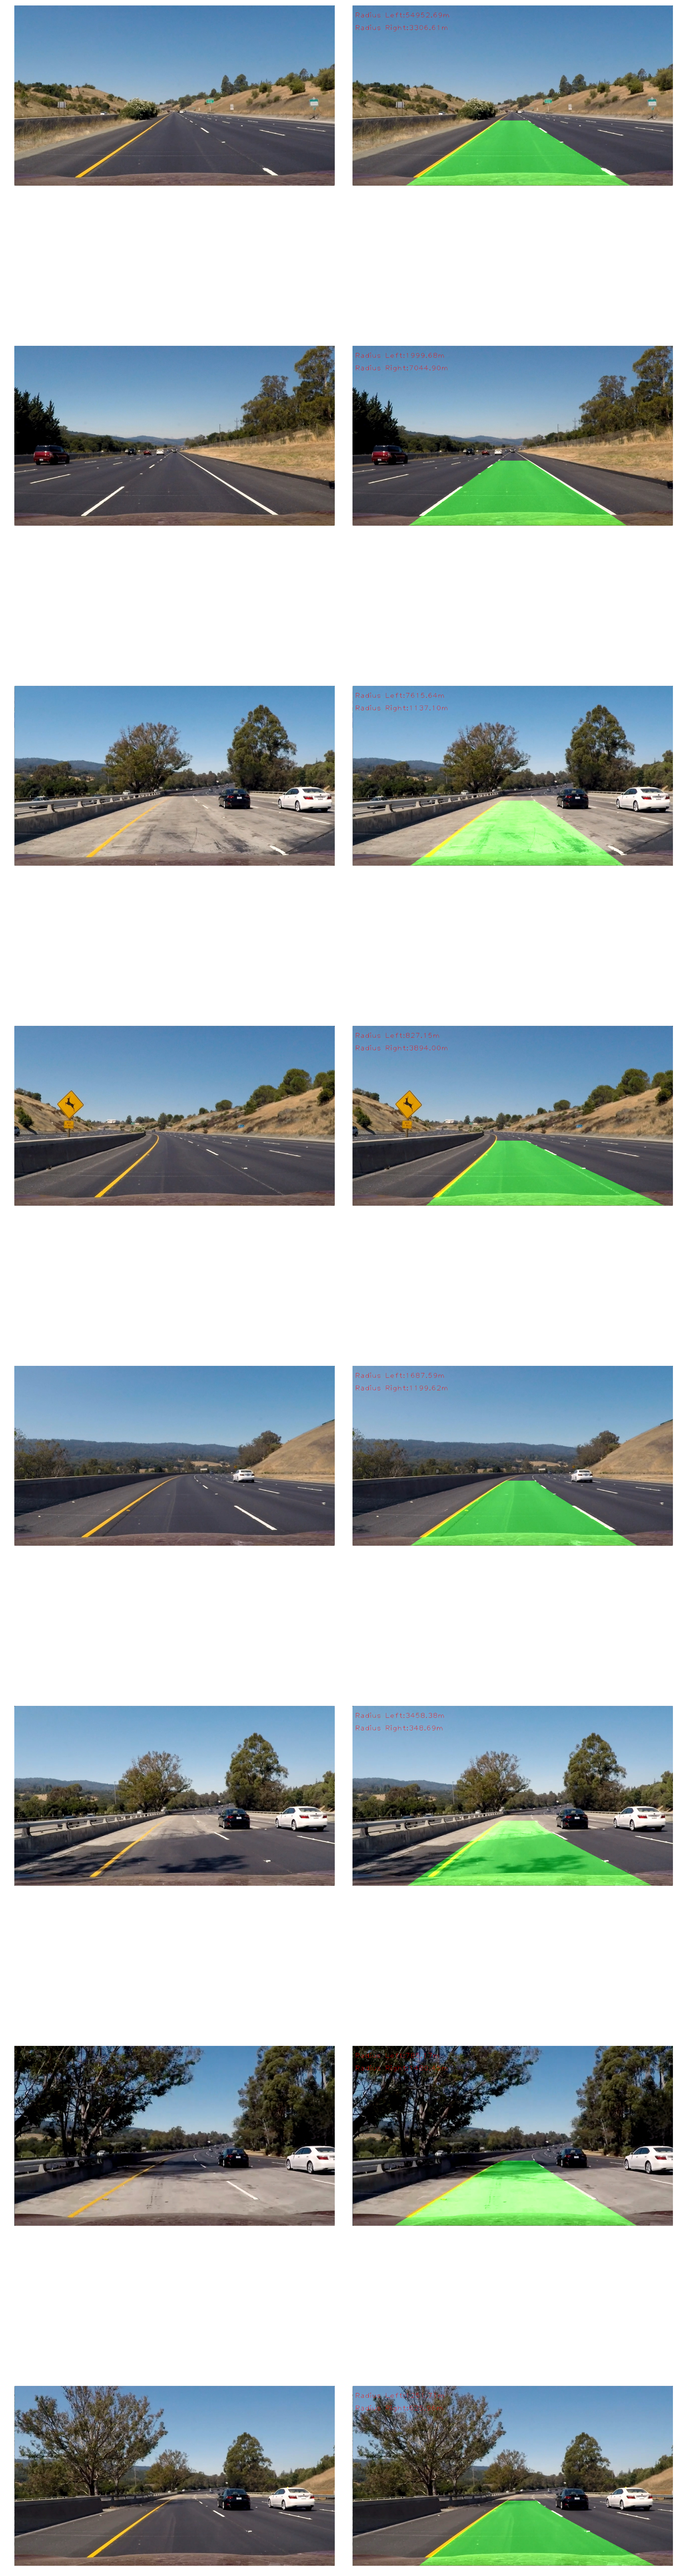

In [5]:
#imagenames = glob.glob('snapshots/*.png')
imagenames = glob.glob('test_images/*.jpg')

images = []
for ix,fname in enumerate(imagenames):
    img = mpimg.imread(fname)
    
    lane = Lane()
    out = lane.sliding_window(img)
    warp = fast_warp_lane(out)

    out = cv2.addWeighted(img, 1.0, warp, 0.5, 0)
    lane.draw_curvature(out)

    images.append([img, out])
plot_images(images)
    

 
##Writeup Template
###You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./1_undistort.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"

## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points
###Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
###Camera Calibration

####1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in `calibrate.py`.

First `objp` array of points is created. Then we get a glob of all files in `camera_cal` file. 
Then we iterate over all images and run `cv2.findChessboardCorners`. The returned `corners` along with `objp` are appended into `objpoints` and `corners` array.

At the end, all these `objpoints` and `imgpoints` are passed to `cv2.calibrateCamera` and returned `mtx, dist` is saved into a `calibration.pkl` file.

![Distorted and Undistorted][image1]

###Pipeline (single images)

####1. Provide an example of a distortion-corrected image.
To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
![alt text][image2]
####2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.
I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in `another_file.py`).  Here's an example of my output for this step.  (note: this is not actually from one of the test images)

![alt text][image3]

####3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

```
This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

![alt text][image4]

####4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

Then I did some other stuff and fit my lane lines with a 2nd order polynomial kinda like this:

![alt text][image5]

####5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in lines # through # in my code in `my_other_file.py`

####6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines # through # in my code in `yet_another_file.py` in the function `map_lane()`.  Here is an example of my result on a test image:

![alt text][image6]

---

###Pipeline (video)

####1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](./project_video.mp4)

---

###Discussion

####1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  


